In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/sample_data/Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


<Axes: xlabel='Churn', ylabel='count'>

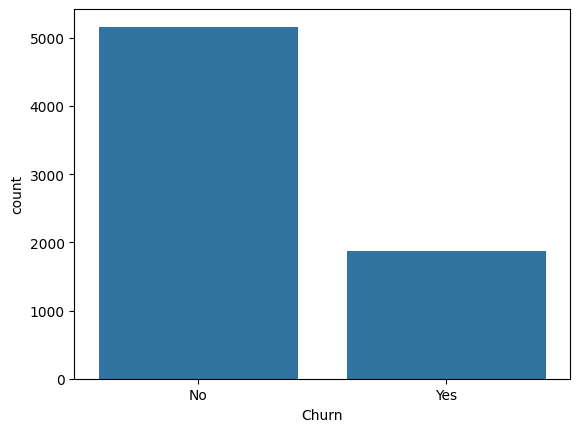

In [11]:
sns.countplot(x='Churn', data=df)

In [8]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


<Axes: xlabel='Churn', ylabel='TotalCharges'>

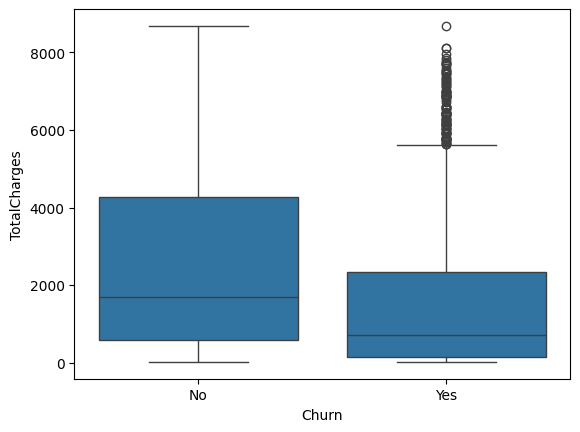

In [14]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

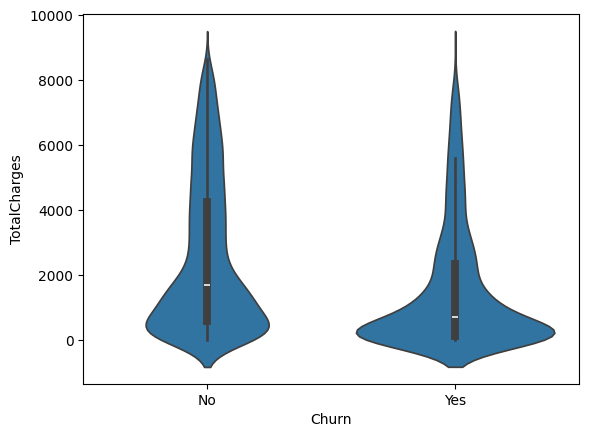

In [9]:
sns.violinplot(x='Churn', y='TotalCharges', data=df)

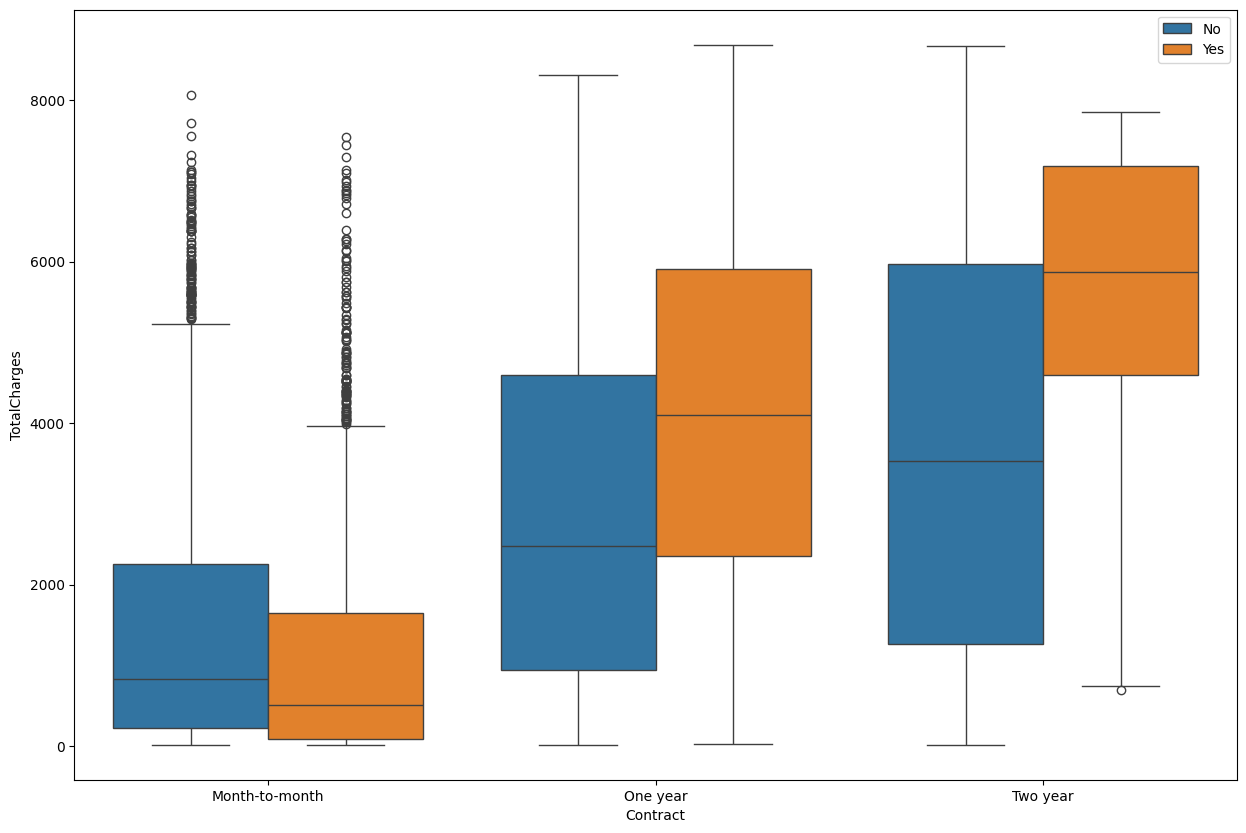

In [10]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Contract', y='TotalCharges', data=df, hue = 'Churn')
plt.legend(loc='upper right')

In [ ]:
corr_df = pd.get_dummies(df[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']], drop_first=True).corr()

In [ ]:
corr_2 = corr_df['Churn_Yes'].sort_values().iloc[1:]

In [ ]:
plt.figure(figsize=(15,10),dpi=200)
sns.barplot(x=corr_2.index,y=corr_2.values)
plt.xticks(rotation=90)

In [5]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [6]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1685
One year,1472


<Axes: xlabel='tenure', ylabel='Count'>

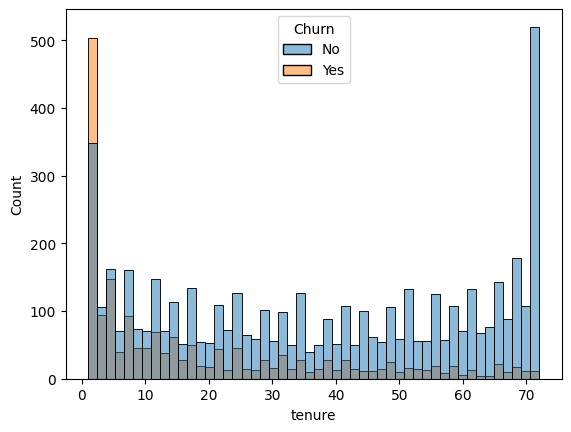

In [9]:
sns.histplot(x='tenure', data=df, hue='Churn',bins=50)

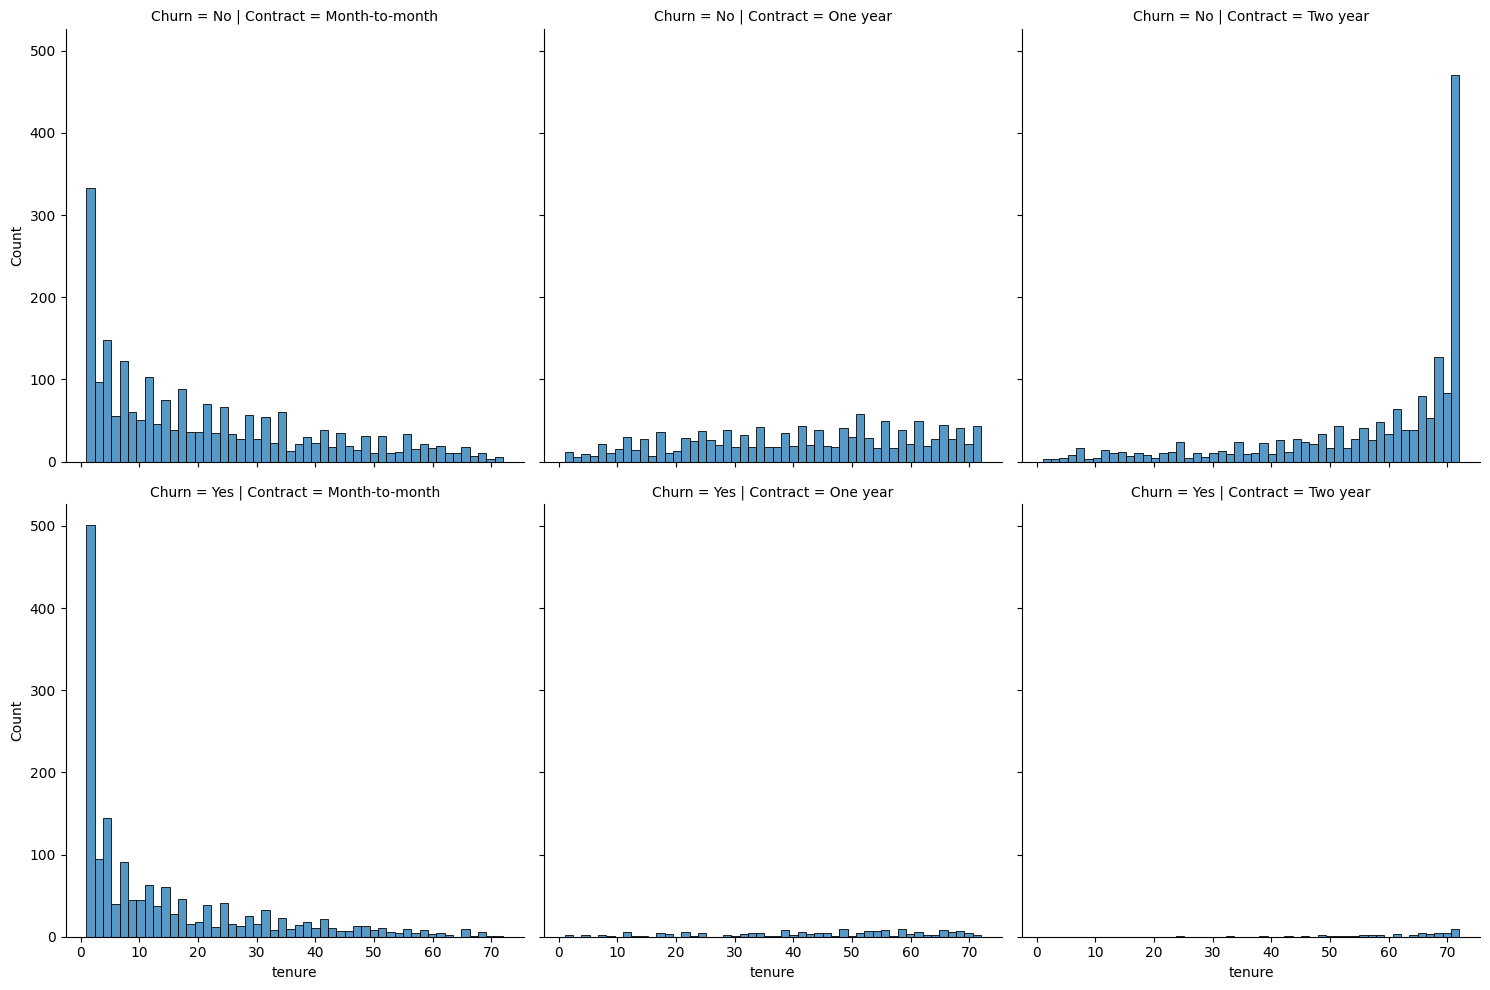

In [10]:
sns.displot(data=df,x='tenure',bins = 50, col='Contract',row='Churn')

<Axes: xlabel='TotalCharges', ylabel='MonthlyCharges'>

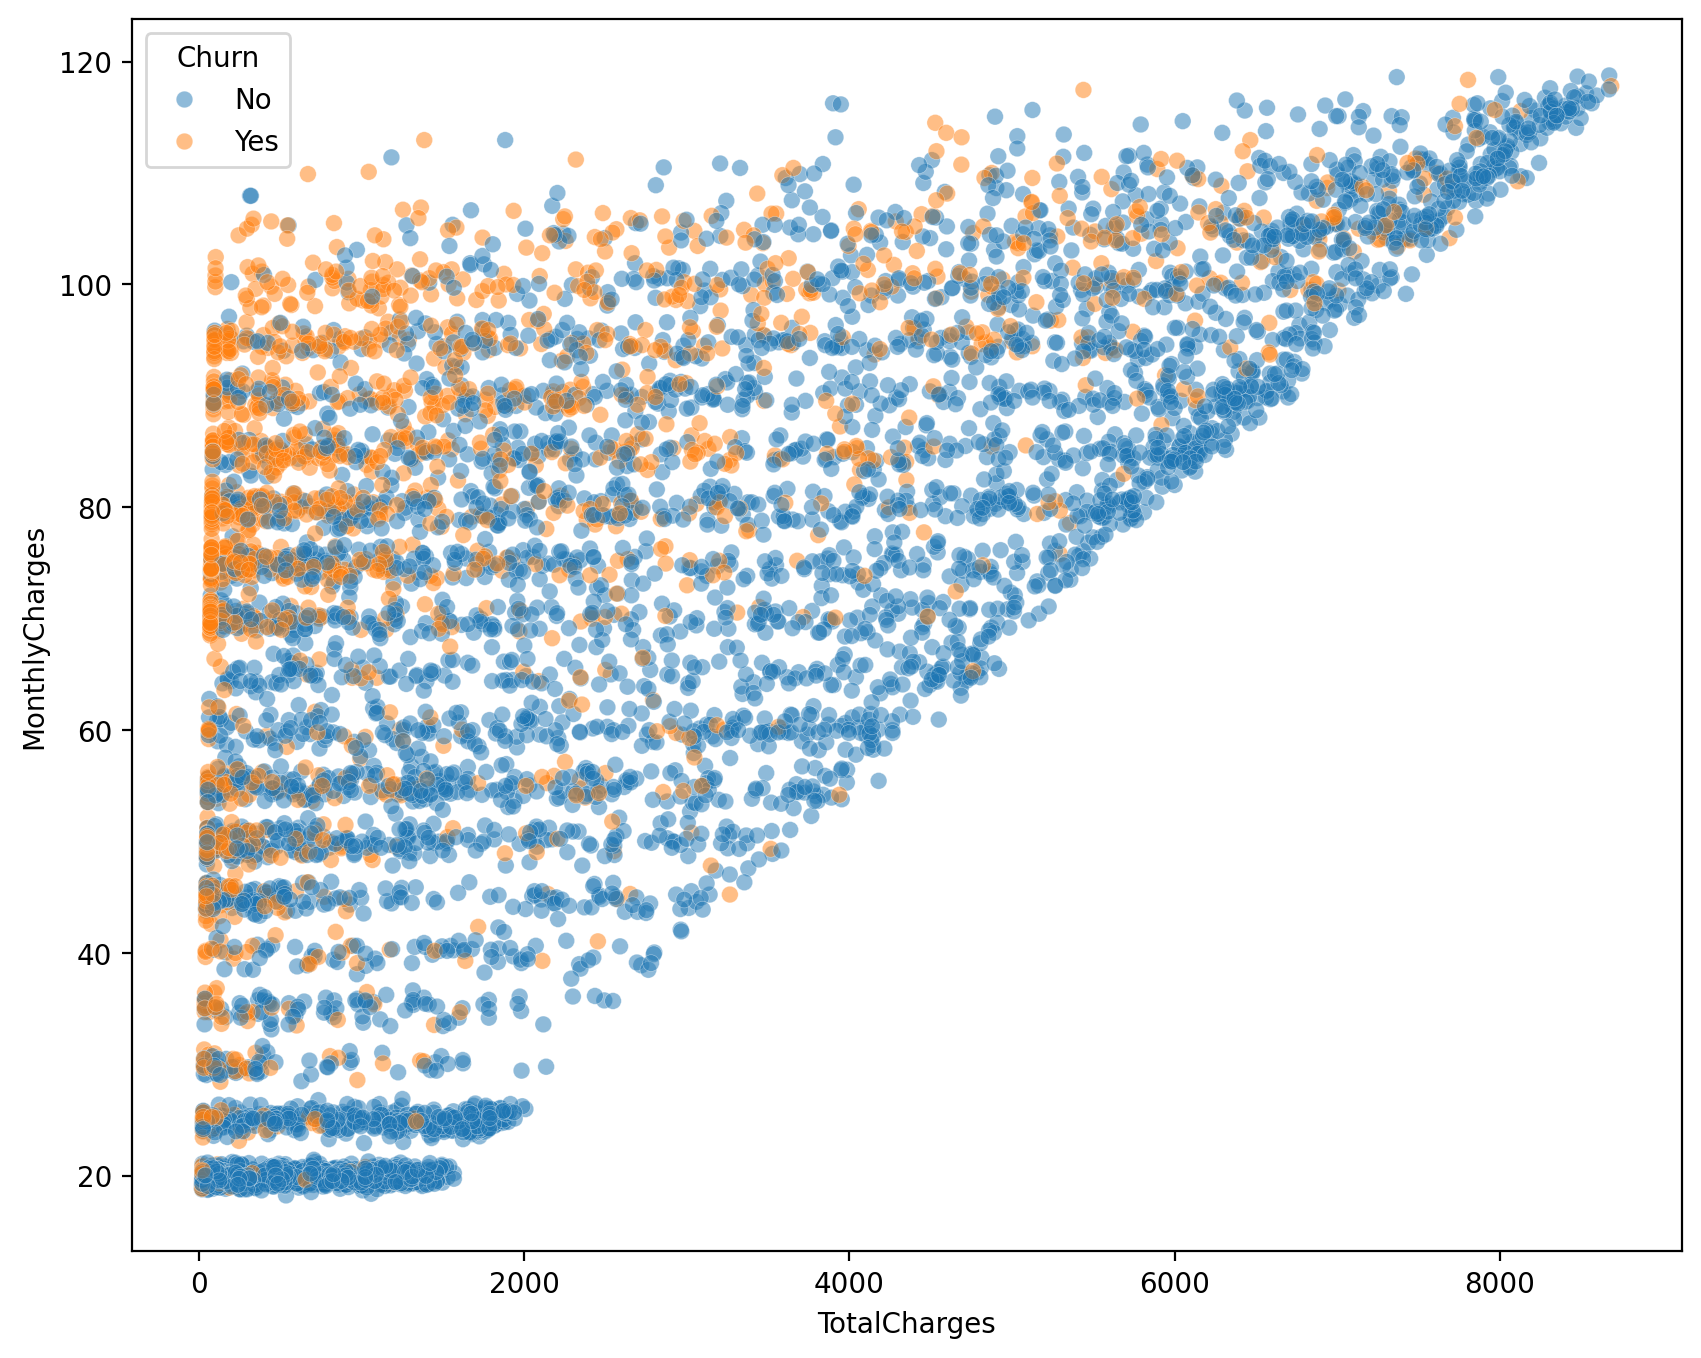

In [15]:
plt.figure(figsize=(10,8),dpi= 200)
sns.scatterplot(data=df, x='TotalCharges',y='MonthlyCharges',hue='Churn',alpha=0.5,linewidth=0.2)

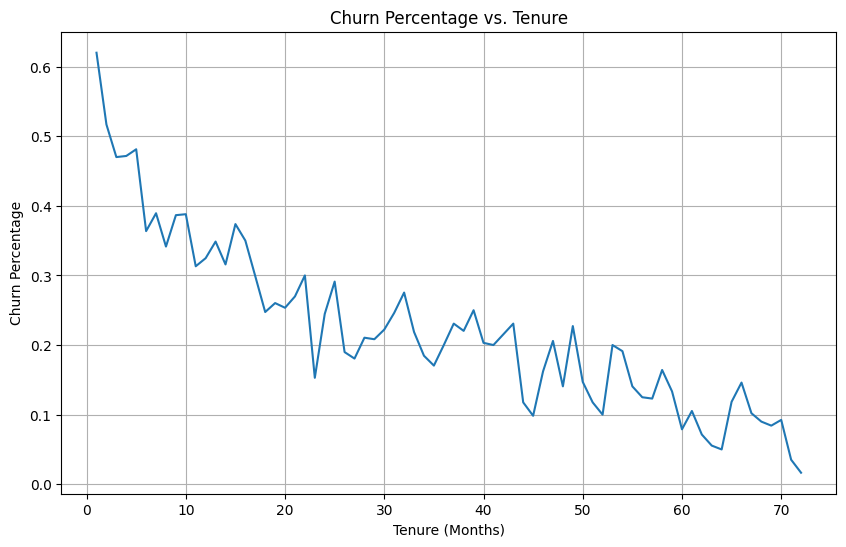

In [16]:
churn_by_tenure = df.groupby('tenure')['Churn'].value_counts(normalize=True).unstack().fillna(0)
plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_by_tenure, x=churn_by_tenure.index, y='Yes')
plt.title('Churn Percentage vs. Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Percentage')
plt.grid(True)
plt.show()

In [20]:
df['Tenure_Chohort'] = pd.cut(df['tenure'],
                              bins=[0, 12, 24, 48,
                                    float('inf')],
                              labels=['0-12', '12-24','24-48', '>48'])

In [23]:
df[['Tenure_Chohort','tenure']]

,Tenure_Chohort,tenure
0,0-12,1
1,24-48,34
2,0-12,2
3,24-48,45
4,0-12,2
...,...,...
7027,12-24,24
7028,>48,72
7029,0-12,11
7030,0-12,4


<Axes: xlabel='TotalCharges', ylabel='MonthlyCharges'>

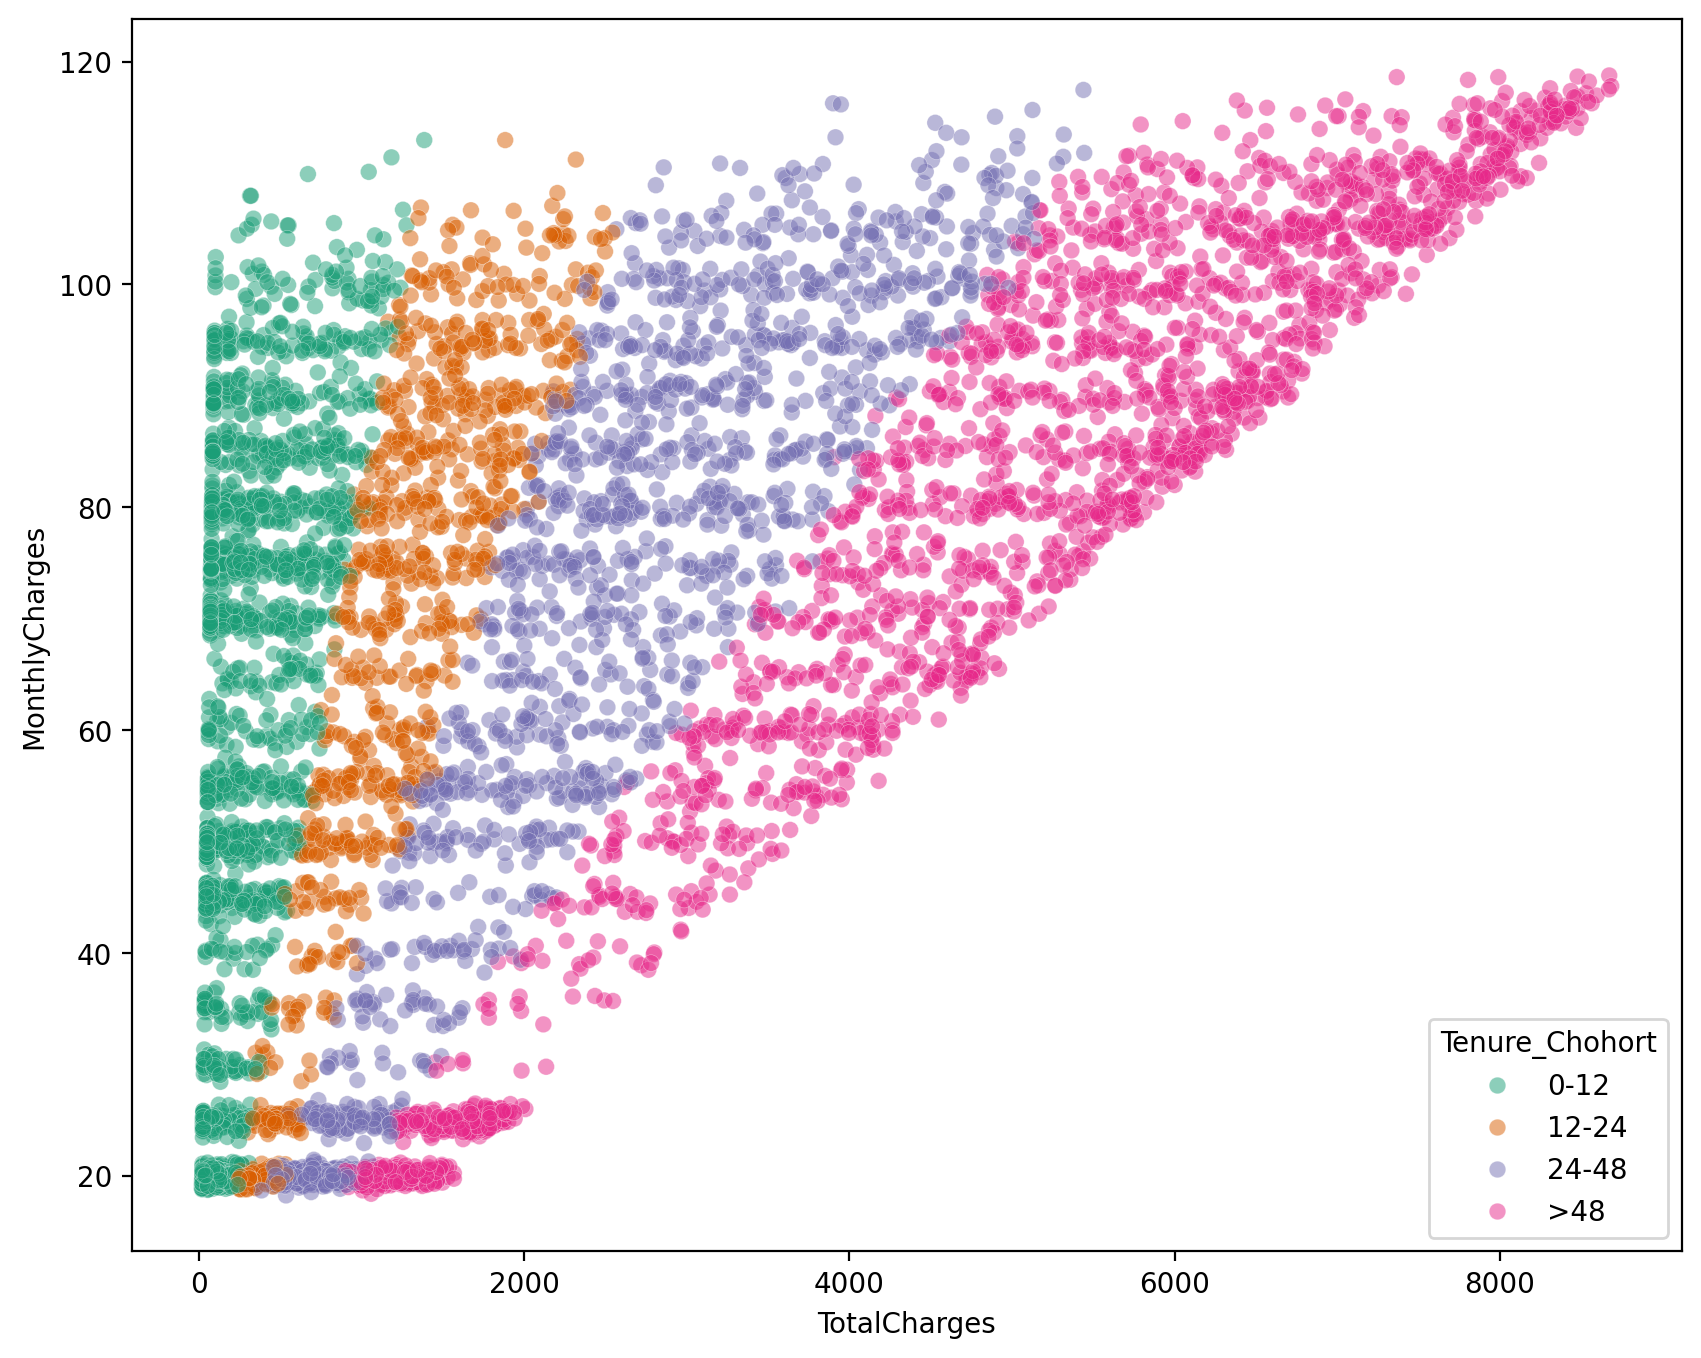

In [25]:
plt.figure(figsize=(10,8),dpi= 200)
sns.scatterplot(data=df, x='TotalCharges',y='MonthlyCharges',hue='Tenure_Chohort',alpha=0.5,linewidth=0.2,palette='Dark2')

<Axes: xlabel='Tenure_Chohort', ylabel='count'>

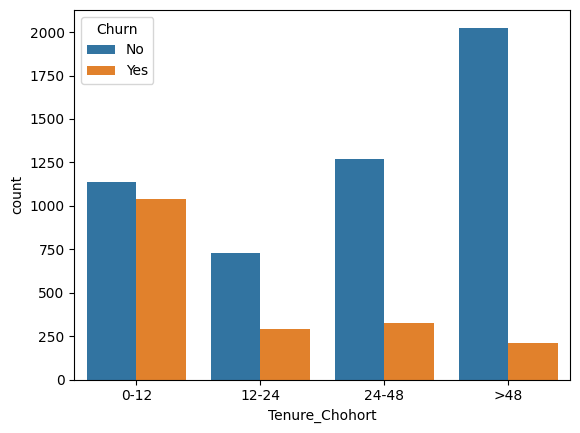

In [26]:
sns.countplot(data=df, x='Tenure_Chohort', hue='Churn')

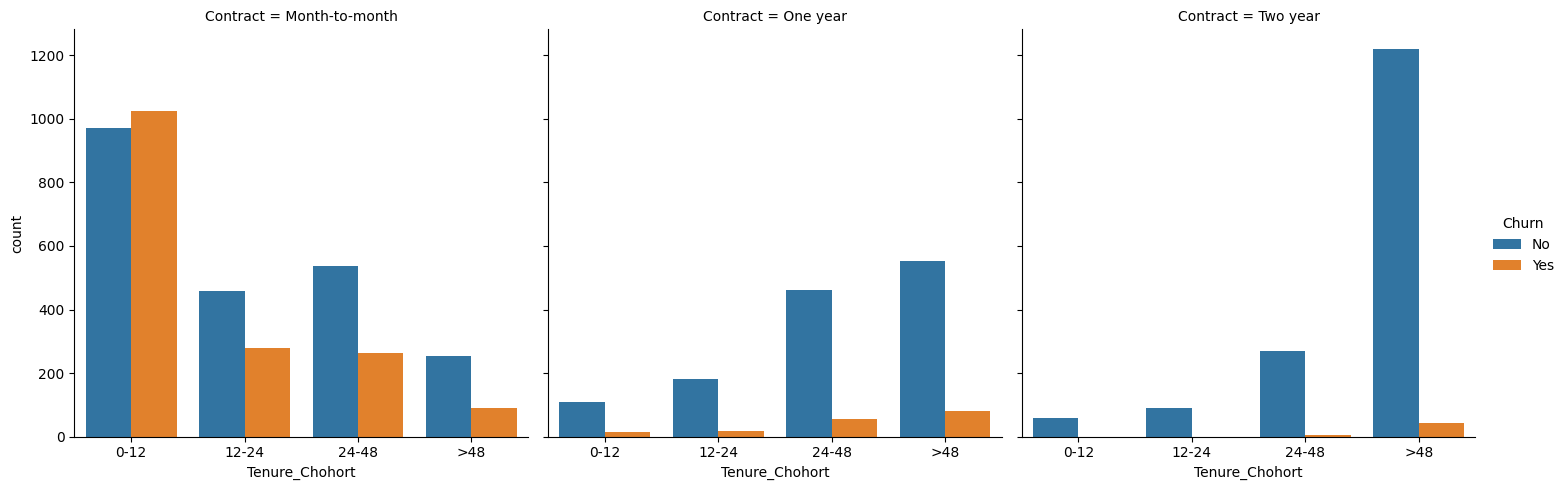

In [30]:
sns.catplot(data=df,x='Tenure_Chohort',hue='Churn',kind='count',col='Contract')

In [32]:
X = df.drop(['customerID','Churn'],axis=1)

In [33]:
X = pd.get_dummies(X,drop_first=True)

In [37]:
y = df['Churn']

In [35]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
dt = DecisionTreeClassifier(max_depth=6)

In [42]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [44]:
y_pred_dt = dt.predict(X_test)

In [45]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



In [46]:
confusion_matrix(y_test,y_pred_dt)

array([[498,  59],
       [ 75,  72]])

In [52]:
imp_feat_dt = pd.DataFrame(data=dt.feature_importances_,index=X_train.columns,columns=['Importance'])

In [56]:
imp_feats =  imp_feat_dt.sort_values(by='Importance',ascending=False)
imp_feat_dt2 = imp_feats[imp_feats['Importance']>0]

In [57]:
imp_feat_dt2

,Importance
tenure,0.423914
InternetService_Fiber optic,0.314060
TotalCharges,0.066135
MonthlyCharges,0.042293
PaymentMethod_Electronic check,0.034436
Contract_Two year,0.027065
StreamingMovies_No internet service,0.026290
SeniorCitizen,0.012680
MultipleLines_Yes,0.012432
Contract_One year,0.010021


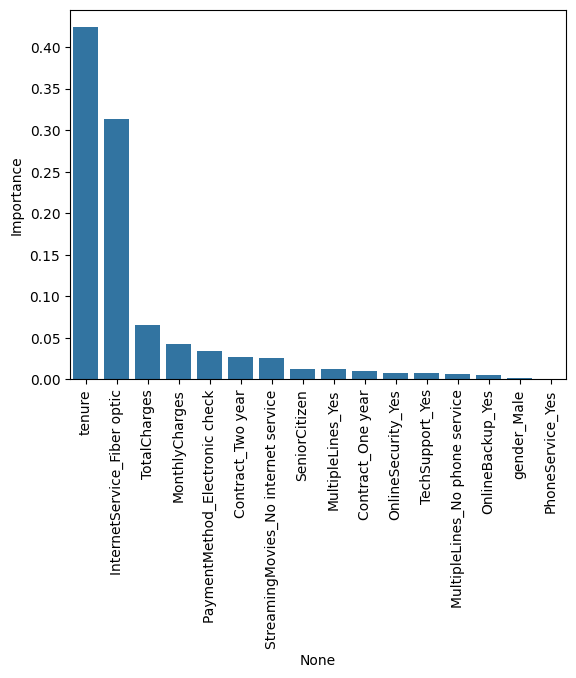

In [60]:
sns.barplot(x=imp_feat_dt2.index,y=imp_feat_dt2['Importance'])
plt.xticks(rotation=90);

In [61]:
from sklearn.tree import plot_tree

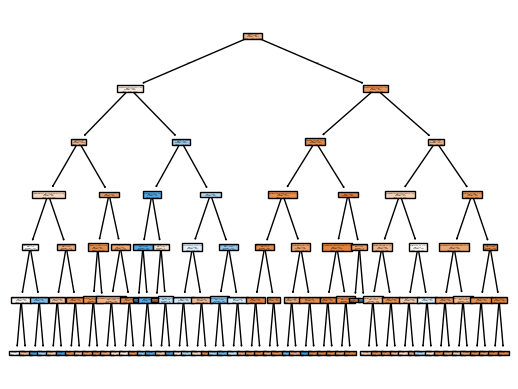

In [63]:
plot_tree(dt,feature_names=X_train.columns,filled=True);

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier(n_estimators=100,max_depth=6)

In [49]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6)

In [50]:
pred_rf = rf.predict(X_test)

In [64]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

          No       0.86      0.93      0.90       557
         Yes       0.62      0.44      0.52       147

    accuracy                           0.83       704
   macro avg       0.74      0.69      0.71       704
weighted avg       0.81      0.83      0.82       704



In [65]:
confusion_matrix(y_test,pred_rf)

array([[518,  39],
       [ 82,  65]])

In [66]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [67]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [68]:
ada_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [69]:
adapreds = ada_model.predict(X_test)
gbpreds = gb_model.predict(X_test)

In [70]:
print(classification_report(y_test,adapreds))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.62      0.50      0.56       147

    accuracy                           0.83       704
   macro avg       0.75      0.71      0.73       704
weighted avg       0.82      0.83      0.83       704



In [71]:
print(classification_report(y_test,gbpreds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



In [72]:
confusion_matrix(y_test,adapreds)

array([[512,  45],
       [ 73,  74]])

In [73]:
confusion_matrix(y_test,gbpreds)

array([[503,  54],
       [ 74,  73]])